In [1]:
#import libraries
import pandas as pd
import mpl_style
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme()
import warnings
warnings.filterwarnings('ignore')
from scipy import stats

#import sklearn packages
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc

In [2]:
plt.style.use(mpl_style.style1)

In [3]:
#read data  
df = pd.read_csv('./exoplanets.csv', index_col=False)

In [4]:
df.head()

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 49 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   kepid              9564 non-null   int64  
 1   kepoi_name         9564 non-null   object 
 2   kepler_name        2359 non-null   object 
 3   koi_disposition    9564 non-null   object 
 4   koi_pdisposition   9564 non-null   object 
 5   koi_score          8054 non-null   float64
 6   koi_fpflag_nt      9564 non-null   int64  
 7   koi_fpflag_ss      9564 non-null   int64  
 8   koi_fpflag_co      9564 non-null   int64  
 9   koi_fpflag_ec      9564 non-null   int64  
 10  koi_period         9564 non-null   float64
 11  koi_period_err1    9110 non-null   float64
 12  koi_period_err2    9110 non-null   float64
 13  koi_time0bk        9564 non-null   float64
 14  koi_time0bk_err1   9110 non-null   float64
 15  koi_time0bk_err2   9110 non-null   float64
 16  koi_impact         9201 

In [6]:
df = df.rename(columns={'kepid':'KepID',
'kepoi_name':'KOIName',
'kepler_name':'KeplerName',
'koi_disposition':'ExoplanetArchiveDisposition',
'koi_pdisposition':'DispositionUsingKeplerData',
'koi_score':'DispositionScore',
'koi_fpflag_nt':'NotTransit-LikeFalsePositiveFlag',
'koi_fpflag_ss':'koi_fpflag_ss',
'koi_fpflag_co':'CentroidOffsetFalsePositiveFlag',
'koi_fpflag_ec':'EphemerisMatchIndicatesContaminationFalsePositiveFlag',
'koi_period':'OrbitalPeriod[days]',
'koi_period_err1':'OrbitalPeriodUpperUnc.[days]',
'koi_period_err2':'OrbitalPeriodLowerUnc.[days]',
'koi_time0bk':'TransitEpoch[BKJD]',
'koi_time0bk_err1':'TransitEpochUpperUnc.[BKJD]',
'koi_time0bk_err2':'TransitEpochLowerUnc.[BKJD]',
'koi_impact':'ImpactParameter',
'koi_impact_err1':'ImpactParameterUpperUnc',
'koi_impact_err2':'ImpactParameterLowerUnc',
'koi_duration':'TransitDuration[hrs]',
'koi_duration_err1':'TransitDurationUpperUnc.[hrs]',
'koi_duration_err2':'TransitDurationLowerUnc.[hrs]',
'koi_depth':'TransitDepth[ppm]',
'koi_depth_err1':'TransitDepthUpperUnc.[ppm]',
'koi_depth_err2':'TransitDepthLowerUnc.[ppm]',
'koi_prad':'PlanetaryRadius[Earthradii]',
'koi_prad_err1':'PlanetaryRadiusUpperUnc.[Earthradii]',
'koi_prad_err2':'PlanetaryRadiusLowerUnc.[Earthradii]',
'koi_teq':'EquilibriumTemperature[K',
'koi_teq_err1':'EquilibriumTemperatureUpperUnc.[K]',
'koi_teq_err2':'EquilibriumTemperatureLowerUnc.[K]',
'koi_insol':'InsolationFlux[Earthflux]',
'koi_insol_err1':'InsolationFluxUpperUnc.[Earthflux]',
'koi_insol_err2':'InsolationFluxLowerUnc.[Earthflux]',
'koi_model_snr':'TransitSignal-to-Noise',
'koi_tce_plnt_num':'TCEPlanetNumber',
'koi_tce_delivname':'TCEDeliver',
'koi_steff':'StellarEffectiveTemperature[K]',
'koi_steff_err1':'StellarEffectiveTemperatureUpperUnc.[K]',
'koi_steff_err2':'StellarEffectiveTemperatureLowerUnc.[K]',
'koi_slogg':'StellarSurfaceGravity[log10(cm/s**2)]',
'koi_slogg_err1':'StellarSurfaceGravityUpperUnc.[log10(cm/s**2)]',
'koi_slogg_err2':'StellarSurfaceGravityLowerUnc.[log10(cm/s**2)]',
'koi_srad':'StellarRadius[Solarradii]',
'koi_srad_err1':'StellarRadiusUpperUnc.[Solarradii]',
'koi_srad_err2':'StellarRadiusLowerUnc.[Solarradii]',
'ra':'RA[decimaldegrees]',
'dec':'Dec[decimaldegrees]',
'koi_kepmag':'Kepler-band[mag]'
})
df

,KepID,KOIName,KeplerName,ExoplanetArchiveDisposition,DispositionUsingKeplerData,DispositionScore,NotTransit-LikeFalsePositiveFlag,koi_fpflag_ss,CentroidOffsetFalsePositiveFlag,EphemerisMatchIndicatesContaminationFalsePositiveFlag,...,StellarEffectiveTemperatureLowerUnc.[K],StellarSurfaceGravity[log10(cm/s**2)],StellarSurfaceGravityUpperUnc.[log10(cm/s**2)],StellarSurfaceGravityLowerUnc.[log10(cm/s**2)],StellarRadius[Solarradii],StellarRadiusUpperUnc.[Solarradii],StellarRadiusLowerUnc.[Solarradii],RA[decimaldegrees],Dec[decimaldegrees],Kepler-band[mag]
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,10090151,K07985.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,0,...,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9560,10128825,K07986.01,NaN,CANDIDATE,CANDIDATE,0.497,0,0,0,0,...,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
9561,10147276,K07987.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.021,0,0,1,0,...,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385
9562,10155286,K07988.01,NaN,CANDIDATE,CANDIDATE,0.092,0,0,0,0,...,-128.0,2.992,0.030,-0.027,7.824,0.223,-1.896,296.76288,47.145142,10.998


In [7]:
df.describe()

,KepID,DispositionScore,NotTransit-LikeFalsePositiveFlag,koi_fpflag_ss,CentroidOffsetFalsePositiveFlag,EphemerisMatchIndicatesContaminationFalsePositiveFlag,OrbitalPeriod[days],OrbitalPeriodUpperUnc.[days],OrbitalPeriodLowerUnc.[days],TransitEpoch[BKJD],...,StellarEffectiveTemperatureLowerUnc.[K],StellarSurfaceGravity[log10(cm/s**2)],StellarSurfaceGravityUpperUnc.[log10(cm/s**2)],StellarSurfaceGravityLowerUnc.[log10(cm/s**2)],StellarRadius[Solarradii],StellarRadiusUpperUnc.[Solarradii],StellarRadiusLowerUnc.[Solarradii],RA[decimaldegrees],Dec[decimaldegrees],Kepler-band[mag]
count,9.564000e+03,8054.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9110.000000,9110.000000,9564.000000,...,9081.000000,9201.000000,9096.000000,9096.000000,9201.000000,9096.000000,9096.000000,9564.000000,9564.000000,9563.000000
mean,7.690628e+06,0.480829,0.208595,0.232748,0.197512,0.120033,75.671358,0.002148,-0.002148,166.183251,...,-162.265059,4.310157,0.120738,-0.143161,1.728712,0.362292,-0.394806,292.060163,43.810433,14.264606
std,2.653459e+06,0.476928,4.767290,0.422605,0.398142,0.325018,1334.744046,0.008243,0.008243,67.918960,...,72.746348,0.432606,0.132837,0.085477,6.127185,0.930870,2.168213,4.766657,3.601243,1.385448
min,7.574500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.241843,0.000000,-0.173000,120.515914,...,-1762.000000,0.047000,0.000000,-1.207000,0.109000,0.000000,-116.137000,279.852720,36.577381,6.966000
25%,5.556034e+06,0.000000,0.000000,0.000000,0.000000,0.000000,2.733684,0.000005,-0.000276,132.761718,...,-198.000000,4.218000,0.042000,-0.196000,0.829000,0.129000,-0.250000,288.660770,40.777173,13.440000
50%,7.906892e+06,0.334000,0.000000,0.000000,0.000000,0.000000,9.752831,0.000035,-0.000035,137.224595,...,-160.000000,4.438000,0.070000,-0.128000,1.000000,0.251000,-0.111000,292.261125,43.677504,14.520000
75%,9.873066e+06,0.998000,0.000000,0.000000,0.000000,0.000000,40.715178,0.000276,-0.000005,170.694603,...,-114.000000,4.543000,0.149000,-0.088000,1.345000,0.364000,-0.069000,295.859160,46.714611,15.322000
max,1.293514e+07,1.000000,465.000000,1.000000,1.000000,1.000000,129995.778400,0.173000,0.000000,1472.522306,...,0.000000,5.364000,1.472000,0.000000,229.908000,33.091000,0.000000,301.720760,52.336010,20.003000


In [8]:
df['ExoPlanetCandidate'] = df['DispositionUsingKeplerData'].apply(lambda x: 1 if x == 'CANDIDATE' else 0)
df['ExoPlanetConfirmed'] = df['ExoplanetArchiveDisposition'].apply(lambda x: 2 if x == 'CONFIRMED' else 1 if x == 'CANDIDATE' else 0 )

In [9]:
df_dropped = df.copy()

In [10]:
# sns.set_style("darkgrid")
# sns.set(rc={'figure.figsize':(8.7,12.27)})
# sns.countplot(x='StellarEclipseFalsePositiveFlag', data=df_dropped, palette='muted')


In [11]:
df_dropped.drop(columns=['KeplerName','EquilibriumTemperatureUpperUnc.[K]','KOIName',
                 'KepID','ExoplanetArchiveDisposition','TCEDeliver',
                 'NotTransit-LikeFalsePositiveFlag','EphemerisMatchIndicatesContaminationFalsePositiveFlag',
                 'koi_fpflag_ss','CentroidOffsetFalsePositiveFlag',
                 'DispositionUsingKeplerData',
                 'EquilibriumTemperatureLowerUnc.[K]'], inplace=True)

In [12]:
df_dropped.isna().any()
df_dropped.dropna(inplace=True) # Remove all columns with NaN values

In [13]:
df_dropped

,DispositionScore,OrbitalPeriod[days],OrbitalPeriodUpperUnc.[days],OrbitalPeriodLowerUnc.[days],TransitEpoch[BKJD],TransitEpochUpperUnc.[BKJD],TransitEpochLowerUnc.[BKJD],ImpactParameter,ImpactParameterUpperUnc,ImpactParameterLowerUnc,...,StellarSurfaceGravityUpperUnc.[log10(cm/s**2)],StellarSurfaceGravityLowerUnc.[log10(cm/s**2)],StellarRadius[Solarradii],StellarRadiusUpperUnc.[Solarradii],StellarRadiusLowerUnc.[Solarradii],RA[decimaldegrees],Dec[decimaldegrees],Kepler-band[mag],ExoPlanetCandidate,ExoPlanetConfirmed
0,1.000,9.488036,2.780000e-05,-2.780000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,...,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,1,2
1,0.969,54.418383,2.480000e-04,-2.480000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,...,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,1,2
2,0.000,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,...,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436,1,1
3,0.000,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,...,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597,0,0
4,1.000,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,...,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,0.000,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,-0.000170,1.252,0.051,-0.049,...,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082,0,0
9560,0.497,1.739849,1.780000e-05,-1.780000e-05,133.001270,0.007690,-0.007690,0.043,0.423,-0.043,...,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757,1,1
9561,0.021,0.681402,2.430000e-06,-2.430000e-06,132.181750,0.002850,-0.002850,0.147,0.309,-0.147,...,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385,0,0
9562,0.092,333.486169,4.240000e-03,-4.240000e-03,153.615010,0.005070,-0.005070,0.214,0.255,-0.214,...,0.030,-0.027,7.824,0.223,-1.896,296.76288,47.145142,10.998,1,1


In [14]:
print('minimum right ascension: ' + str(df_dropped['RA[decimaldegrees]'].min()) + ' degrees')
print('maximum right ascension: ' + str(df_dropped['RA[decimaldegrees]'].max()) + ' degrees')

minimum right ascension: 279.85608 degrees
maximum right ascension: 301.72076 degrees


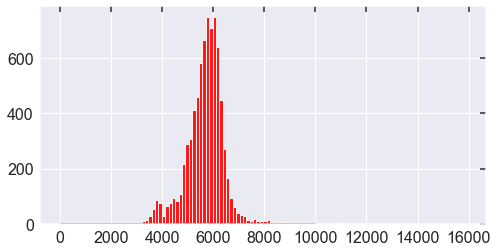

In [15]:
# fig, ax = plt.subplots(1, 2)
# ax[0] = plt.hist(df['StellarRadius[Solar radii]'], bins=100)
# ax[1] = plt.hist(df['StellarEffectiveTemperature[K]'], bins=100)



#plt.hist(df['StellarRadius[Solar radii]'], bins=1000, alpha=0.5)
kde = stats.gaussian_kde(df_dropped['StellarEffectiveTemperature[K]'])
fig, ax = plt.subplots(figsize=(8, 4))
plt.hist(df_dropped['StellarEffectiveTemperature[K]'], bins=100, color='red', alpha=0.9)
xx = np.linspace(0, 10000, 1000)
plt.plot(xx, kde(xx), color='black', linewidth=2.5)

# plt.ylim(0, 1000)

plt.show()

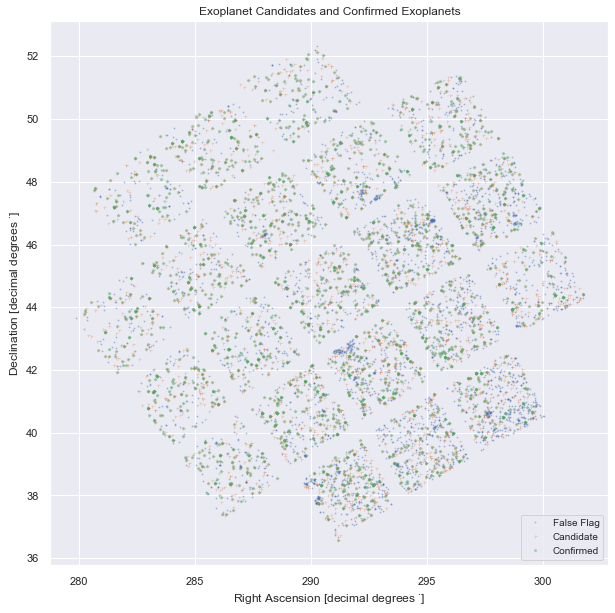

In [32]:
plt.figsize=(40, 40)
sns.set_style('darkgrid')
#plt.plot(df['RA [decimal degrees]'], df['Dec [decimal degrees]'], 'o', markersize=0.5, alpha=0.3)
#plot right ascension and declination for data points that are either confirmed or candidates
plt.plot(df_dropped[df_dropped['ExoPlanetCandidate'] == 0]['RA[decimaldegrees]'], df_dropped[df_dropped['ExoPlanetCandidate'] == 0]['Dec[decimaldegrees]'], 'o', markersize=1, alpha=0.3)
plt.plot(df_dropped[df_dropped['ExoPlanetCandidate'] == 1]['RA[decimaldegrees]'], df_dropped[df_dropped['ExoPlanetCandidate'] == 1]['Dec[decimaldegrees]'], '+', markersize=3, alpha=0.3)
plt.plot(df_dropped[df_dropped['ExoPlanetConfirmed'] == 2]['RA[decimaldegrees]'], df_dropped[df_dropped['ExoPlanetConfirmed'] == 2]['Dec[decimaldegrees]'], '*', markersize=3, alpha=0.3)
plt.xlabel('Right Ascension [decimal degrees $^{\cdot}$]')
plt.ylabel('Declination [decimal degrees $^{\cdot}$]')
plt.title('Exoplanet Candidates and Confirmed Exoplanets')
plt.legend(['False Flag', 'Candidate', 'Confirmed'], loc='lower right', fontsize='smaller')

In [17]:
#remove rows and columns that do not have a high correlation with the exoplanet candidate
corr = df_dropped.corr()
corr = corr[corr['ExoPlanetCandidate'] > 0.1]
corr = corr[corr.index]
corr = corr.drop(['ExoPlanetCandidate'], axis=0)


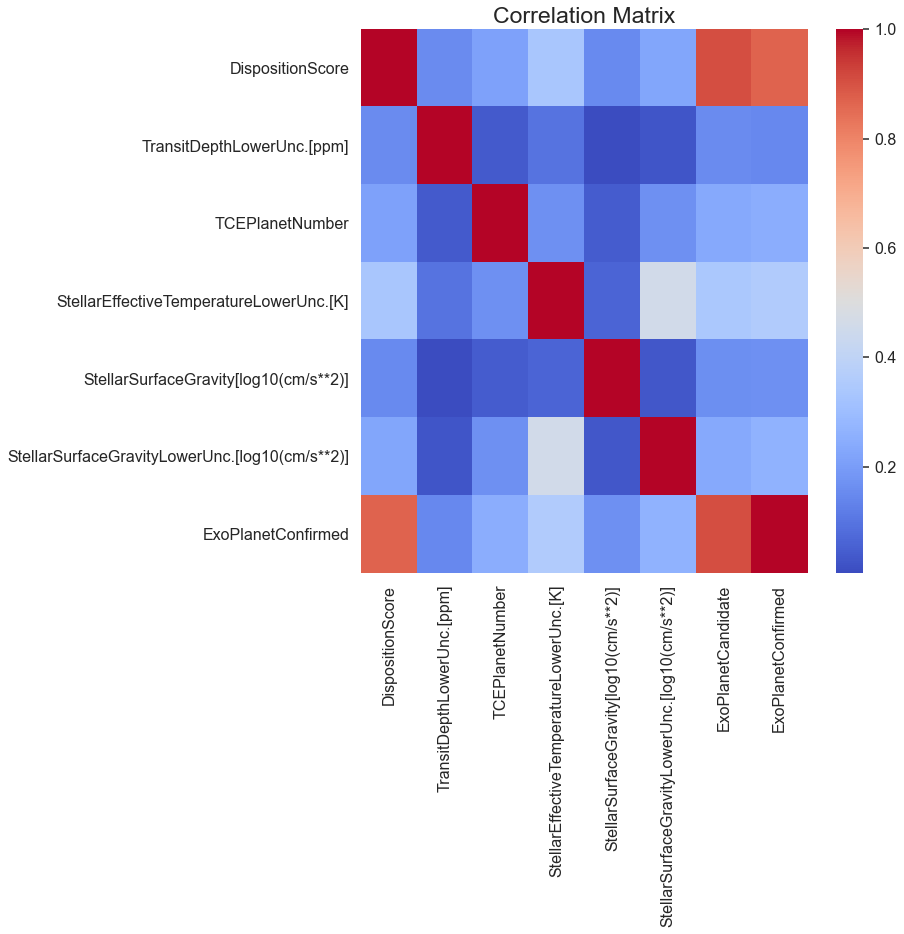

In [18]:
corr.head()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=False, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [19]:
# def clean_data(df):
#     assert isinstance(df, pd.DataFrame), "df needs to be the correct type"
#     df.dropna(inplace=True)
#     indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)


#     return df[indices_to_keep].astype(np.float64)

# clean_data(df_dropped)

def clean_data(df):
    assert isinstance(df, pd.DataFrame), "df needs to be the correct type"
    df.dropna(inplace=True)

    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

clean_data(df_dropped)

,DispositionScore,OrbitalPeriod[days],OrbitalPeriodUpperUnc.[days],OrbitalPeriodLowerUnc.[days],TransitEpoch[BKJD],TransitEpochUpperUnc.[BKJD],TransitEpochLowerUnc.[BKJD],ImpactParameter,ImpactParameterUpperUnc,ImpactParameterLowerUnc,...,StellarSurfaceGravityUpperUnc.[log10(cm/s**2)],StellarSurfaceGravityLowerUnc.[log10(cm/s**2)],StellarRadius[Solarradii],StellarRadiusUpperUnc.[Solarradii],StellarRadiusLowerUnc.[Solarradii],RA[decimaldegrees],Dec[decimaldegrees],Kepler-band[mag],ExoPlanetCandidate,ExoPlanetConfirmed
0,1.000,9.488036,2.780000e-05,-2.780000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,...,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,1.0,2.0
1,0.969,54.418383,2.480000e-04,-2.480000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,...,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,1.0,2.0
2,0.000,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,...,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436,1.0,1.0
3,0.000,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,...,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597,0.0,0.0
4,1.000,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,...,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,0.000,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,-0.000170,1.252,0.051,-0.049,...,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082,0.0,0.0
9560,0.497,1.739849,1.780000e-05,-1.780000e-05,133.001270,0.007690,-0.007690,0.043,0.423,-0.043,...,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757,1.0,1.0
9561,0.021,0.681402,2.430000e-06,-2.430000e-06,132.181750,0.002850,-0.002850,0.147,0.309,-0.147,...,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385,0.0,0.0
9562,0.092,333.486169,4.240000e-03,-4.240000e-03,153.615010,0.005070,-0.005070,0.214,0.255,-0.214,...,0.030,-0.027,7.824,0.223,-1.896,296.76288,47.145142,10.998,1.0,1.0


In [20]:
for col in df_dropped.columns:
    print(col)

DispositionScore
OrbitalPeriod[days]
OrbitalPeriodUpperUnc.[days]
OrbitalPeriodLowerUnc.[days]
TransitEpoch[BKJD]
TransitEpochUpperUnc.[BKJD]
TransitEpochLowerUnc.[BKJD]
ImpactParameter
ImpactParameterUpperUnc
ImpactParameterLowerUnc
TransitDuration[hrs]
TransitDurationUpperUnc.[hrs]
TransitDurationLowerUnc.[hrs]
TransitDepth[ppm]
TransitDepthUpperUnc.[ppm]
TransitDepthLowerUnc.[ppm]
PlanetaryRadius[Earthradii]
PlanetaryRadiusUpperUnc.[Earthradii]
PlanetaryRadiusLowerUnc.[Earthradii]
EquilibriumTemperature[K
InsolationFlux[Earthflux]
InsolationFluxUpperUnc.[Earthflux]
InsolationFluxLowerUnc.[Earthflux]
TransitSignal-to-Noise
TCEPlanetNumber
StellarEffectiveTemperature[K]
StellarEffectiveTemperatureUpperUnc.[K]
StellarEffectiveTemperatureLowerUnc.[K]
StellarSurfaceGravity[log10(cm/s**2)]
StellarSurfaceGravityUpperUnc.[log10(cm/s**2)]
StellarSurfaceGravityLowerUnc.[log10(cm/s**2)]
StellarRadius[Solarradii]
StellarRadiusUpperUnc.[Solarradii]
StellarRadiusLowerUnc.[Solarradii]
RA[decimalde

Text(0.5, 0, 'StellarEffectiveTemperature [K]')

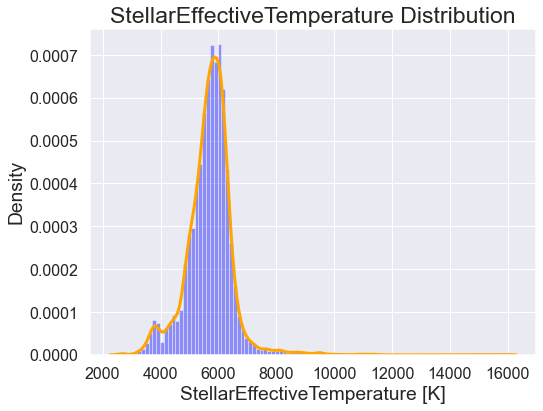

In [21]:
sns.distplot(df_dropped['StellarEffectiveTemperature[K]'], bins=100, color='blue', kde_kws={"color": "orange", "lw": 3, "label": "KDE"})
plt.title('StellarEffectiveTemperature Distribution')
plt.xlabel('StellarEffectiveTemperature [K]')

Text(0.5, 1.0, 'Histogram of Orbital Periods')

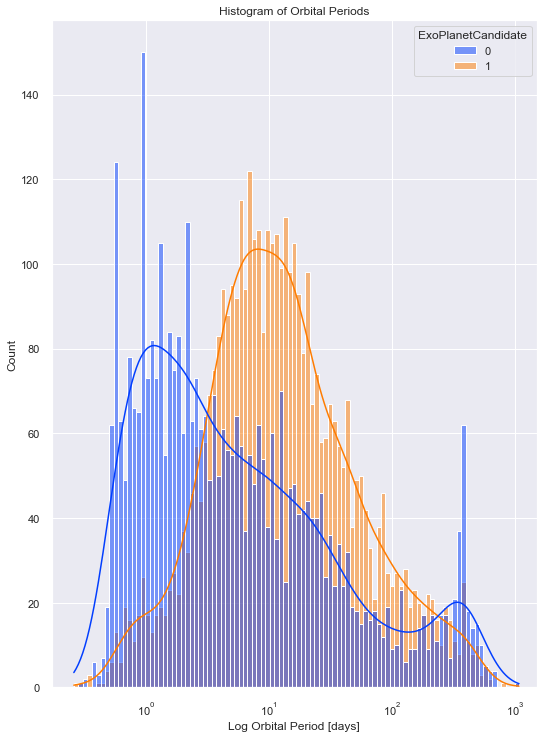

In [65]:
# plot the log scale of the oribital periods in a histogram using seaborn
sns.set(rc={'figure.figsize':(8.7,12.27)})
sns.histplot(x='OrbitalPeriod[days]', data=df_dropped, log_scale=True, palette="bright", hue='ExoPlanetCandidate', kde=True, bins=100, alpha=0.5)
plt.xlim(0, 1500)
plt.xlabel('Log Orbital Period [days]')
plt.title('Histogram of Orbital Periods')

(0.1, 1500)

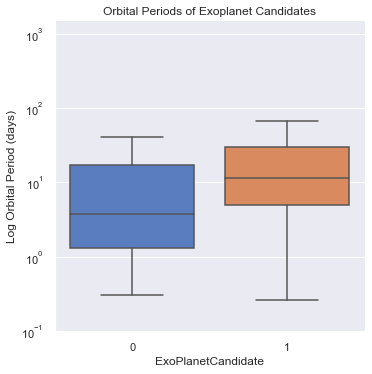

In [23]:
# Create categorical Plot of the Log Scale Orbital Period versus Number of Planets
sns.catplot(x='ExoPlanetCandidate', y='OrbitalPeriod[days]', data=df_dropped, kind='box', palette='muted', showfliers=False)
plt.title('Orbital Periods of Exoplanet Candidates')
plt.yscale('log')
plt.ylabel('Log Orbital Period (days)')
plt.ylim(0.1, 1500)

In [24]:
# Apply feature selection to the data
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler

# Create a function to apply feature selection to the data
def feature_selection(df, k):
    assert isinstance(df, pd.DataFrame), "df needs to be the correct type"
    assert isinstance(k, int), "k needs to be the correct type" # k is the number of features to select
    X = df.drop(['ExoPlanetCandidate'], axis=1)
    y = df['ExoPlanetCandidate']
    X = StandardScaler().fit_transform(X)
    X = SelectKBest(f_classif, k=k).fit_transform(X, y)
    return X, y

# Apply feature selection to the data
#X, y = feature_selection(df_dropped, 10)


In [27]:
X = df_dropped.drop(['ExoPlanetCandidate', 'ExoPlanetConfirmed'], axis=1)
y = df_dropped.ExoPlanetCandidate

In [28]:
# Apply test train split to the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [29]:
rf = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=21)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=21)

In [30]:
# Check the accuracy of the model
y_pred_rf = rf.predict(X_test)
print('Accuracy of random forest classifier on test set: {:.2f}'.format(accuracy_score(y_test, y_pred_rf)))

Accuracy of random forest classifier on test set: 0.96


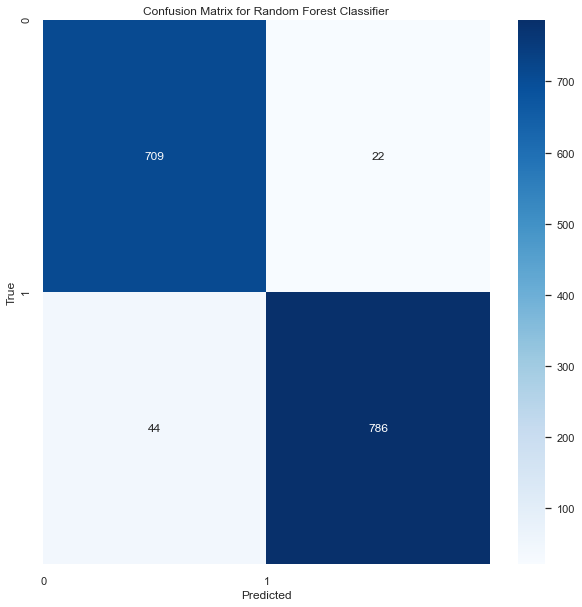

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


In [31]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_rf)

# Reset sns style
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style("darkgrid")
# Plot the confusion matrix
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
#Apply actual labels to the confusion matrix axis
tick_marks = np.arange(len(y_test.unique()))
plt.xticks(tick_marks, y_test.unique())
plt.yticks(tick_marks, y_test.unique())

# Add a title
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()


In [34]:
# Logistic Regression Model
lr = LogisticRegression(C=100, max_iter=200, class_weight='balanced', solver='liblinear')

# Fitting Model to the train set
lr.fit(X_train, y_train)

# Predicting on the test set
y_pred = lr.predict(X_test)

# Check the accuracy of the model
y_pred_lr = lr.predict(X_test)
print('Accuracy of linear regression classifier on test set: {:.2f}'.format(accuracy_score(y_test, y_pred_lr)))

Accuracy of linear regression classifier on test set: 0.79


In [35]:
# Create a classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       0.94      0.97      0.96       731
           1       0.97      0.95      0.96       830

    accuracy                           0.96      1561
   macro avg       0.96      0.96      0.96      1561
weighted avg       0.96      0.96      0.96      1561



In [36]:
# Improve the model using a CV Grid Search
from sklearn.model_selection import GridSearchCV

# Create a function to apply a random grid search to the data that runs in a sensible amount of time
def grid_search(X, y, model, param_grid, cv):
    assert isinstance(X, pd.DataFrame), "X needs to be the correct type"
    assert isinstance(y, pd.Series), "y needs to be the correct type"
    assert isinstance(model, object), "model needs to be the correct type"
    assert isinstance(param_grid, dict), "param_grid needs to be the correct type"
    assert isinstance(cv, int), "cv needs to be the correct type"
    grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, n_jobs=-1, verbose=2)
    grid.fit(X, y)
    return grid.best_score_, grid.best_estimator_

#track progress of grid search
from sklearn.metrics import make_scorer, f1_score
f1 = make_scorer(f1_score , average='weighted')


# Apply a grid search to the data
param_grid = {'n_estimators': [100, 200, 300, 400, 500],
              #'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth': [4, 5, 6, 7, 8],
              #'criterion': ['gini', 'entropy']}
            }
best_score, best_model = grid_search(X_train, y_train, rf, param_grid, 5)
print('Best score: ' + str(best_score))

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:  1.1min finished


Best score: 0.9601094978546941


In [37]:
# Output the best model
print(best_model)

RandomForestClassifier(max_depth=6, n_estimators=200, random_state=21)


In [38]:
# Save the best model
import pickle
# filename = 'best_rf_model_binary.sav'
# pickle.dump(best_model, open(filename, 'wb'))

In [39]:
# Create a second round of grid search using the best model from the first round, but now altering max_features and criterion
param_grid = {'n_estimators': [200],
              'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth': [6],
              'criterion': ['gini', 'entropy']}
best_score2, best_model2 = grid_search(X_train, y_train, best_model, param_grid, 5)


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   15.6s finished


In [40]:
print('Best score for model 2: ' + str(best_score2))
#print the best combination of max_features and criterion
print(best_model2)

Best score for model 2: 0.9601094978546941
RandomForestClassifier(max_depth=6, n_estimators=200, random_state=21)


In [41]:
# Create an adaboost classifier
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(random_state=21)
ada.fit(X_train, y_train)

AdaBoostClassifier(random_state=21)

In [42]:
# Check the accuracy of the model
y_pred = ada.predict(X_test)
print('Accuracy of AdaBoost classifier on test set: {:.2f}'.format(accuracy_score(y_test, y_pred)))
# Worse than random forest classifier

Accuracy of AdaBoost classifier on test set: 0.95


In [51]:
from sklearn.tree import export_graphviz
import os
estimator = rf.estimators_[5]
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X.columns,
                class_names = ['Not Candidate', 'Candidate'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)



In [54]:
os.system('dot -Tpng tree.dot -o tree.png')
#from subprocess import call
#call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

1

In [55]:
# Create a pipeline to apply a grid search to the data
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

# Create a pipeline
pipe = Pipeline([('scaler', StandardScaler()),
                 ('pca', PCA()),
                 ('classifier', RandomForestClassifier(random_state=21))])

# Create a parameter grid
param_grid = {'classifier__n_estimators': [100, 200, 300, 400, 500],
              'classifier__max_features': ['auto', 'sqrt', 'log2'],
              'classifier__max_depth': [4, 5, 6, 7, 8],
              'classifier__criterion': ['gini', 'entropy']}
# Create a grid search object
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
# Fit the grid search
grid.fit(X_train, y_train)
# Output the best score
print(grid.best_score_)
# Output the best estimator
print(grid.best_estimator_)
# Output the best parameters
print(grid.best_params_)
# Output the best model
best_model = grid.best_estimator_
# Check the accuracy of the model
y_pred = best_model.predict(X_test)
print('Accuracy of best model on test set: {:.2f}'.format(accuracy_score(y_test, y_pred)))
# Still worse than the random forest classifier

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 150 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 353 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 636 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  8.4min finished


0.9479346297550861
Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA()),
                ('classifier',
                 RandomForestClassifier(criterion='entropy', max_depth=8,
                                        max_features='log2',
                                        random_state=21))])
{'classifier__criterion': 'entropy', 'classifier__max_depth': 8, 'classifier__max_features': 'log2', 'classifier__n_estimators': 100}
Accuracy of best model on test set: 0.94


In [56]:
# Create a set of classifiers to compare the accuracy of the models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

In [57]:
# Create a list of classifiers
classifiers = [LogisticRegression(solver='liblinear'),
               DecisionTreeClassifier(),
               KNeighborsClassifier(),
               RandomForestClassifier(),
               AdaBoostClassifier(),
               GradientBoostingClassifier(),
               SVC(),
               GaussianNB()]

In [58]:
# Create a function to compare the accuracy of the models
def compare_accuracy(X, y, classifiers):
    assert isinstance(X, pd.DataFrame), "X needs to be the correct type"
    assert isinstance(y, pd.Series), "y needs to be the correct type"
    assert isinstance(classifiers, list), "classifiers needs to be the correct type"
    accuracy = []
    for classifier in classifiers:
        model = classifier
        model.fit(X, y)
        scores = cross_val_score(model, X, y, cv=5)
        accuracy.append(scores.mean())
    return accuracy

In [59]:
# Apply the function to the data
accuracy = compare_accuracy(X_train, y_train, classifiers)

In [60]:
# Create a dataframe of the accuracy scores
accuracy_df = pd.DataFrame(accuracy, index=['LogisticRegression',
                                            'DecisionTreeClassifier',
                                            'KNeighborsClassifier',
                                            'RandomForestClassifier',
                                            'AdaBoostClassifier',
                                            'GradientBoostingClassifier',
                                            'SVC',
                                            'GaussianNB'])


In [61]:
# Rename the accuracy column
accuracy_df.rename(columns={0: 'Accuracy'}, inplace=True)
# Sort the dataframe by accuracy
accuracy_df.sort_values(by='Accuracy', ascending=False, inplace=True)
# Output the dataframe
print(accuracy_df)

                            Accuracy
GradientBoostingClassifier  0.958507
RandomForestClassifier      0.958347
AdaBoostClassifier          0.955944
DecisionTreeClassifier      0.933996
LogisticRegression          0.802630
KNeighborsClassifier        0.801348
SVC                         0.716114
GaussianNB                  0.708104


In [62]:
# Perform last test with a multi layer perceptron
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
print('Accuracy of MLP classifier on test set: {:.2f}'.format(accuracy_score(y_test, y_pred_mlp)))


Accuracy of MLP classifier on test set: 0.71


In [63]:
#Improve the MLP classifier
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)
# Apply the transformations to the data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
print('Accuracy of MLP classifier on test set: {:.2f}'.format(accuracy_score(y_test, y_pred_mlp)))
# Far better than before

Accuracy of MLP classifier on test set: 0.94


In [64]:
# Create an ensemble of the best models
from sklearn.ensemble import VotingClassifier
# Create a list of the best models
models = [('lr', lr), ('rf', rf), ('mlp', mlp)]
# Create a voting classifier
ensemble = VotingClassifier(estimators=models)
# Fit the voting classifier
ensemble.fit(X_train, y_train)
# Check the accuracy of the model
y_pred_ensemble = ensemble.predict(X_test)
print('Accuracy of ensemble classifier on test set: {:.2f}'.format(accuracy_score(y_test, y_pred_ensemble)))



Accuracy of ensemble classifier on test set: 0.95


In [66]:
# Create classification report for the ensemble
print(classification_report(y_test, y_pred_ensemble))
# Recall is the ability of the classifier to find all the positive samples
# Precision is the ability of the classifier not to label as positive a sample that is negative


              precision    recall  f1-score   support

           0       0.94      0.96      0.95       731
           1       0.97      0.94      0.95       830

    accuracy                           0.95      1561
   macro avg       0.95      0.95      0.95      1561
weighted avg       0.95      0.95      0.95      1561



In [69]:
# Create confusion matrix for the ensemble
# confusion_matrix_ensemble = confusion_matrix(y_test, y_pred_ensemble)

# # Reset sns style
# sns.set_style("darkgrid")
# # Plot the confusion matrix
# sns.heatmap(confusion_matrix_ensemble, annot=True, cmap='Blues', fmt='g')
# plt.xlabel('Predicted')
# plt.ylabel('True')
# #Apply actual labels to the confusion matrix axis
# tick_marks = np.arange(len(y_test.unique()))
# plt.xticks(tick_marks, y_test.unique())
# plt.yticks(tick_marks, y_test.unique())

# # Add a title
# plt.title('Confusion Matrix for Random Forest Classifier')
# plt.show()

TypeError: 'numpy.ndarray' object is not callable